**Sentimental Analysis**

We have implemented this task using two different methods:

1.   Multinomial Navie Bayes using NLP
2.   Our Model using tf and keras.




**Multinomial NavieBayes using NLP**

In this code we have implemented sentiment analysis pipeline using basic concepts of NLP for text processing and tokenization ,scikit-learn incorporating the CountVectorizer for feature extraction and the effective MultinomialNB classifier for sentiment classification of  Sarcasm in news headlines. In this model we processes text data, converting headlines into a numerical matrix and train a Naive Bayes classifier to identify sentiment patterns.  This sentiment analysis model proves valuable for efficiently categorizing news headlines based on sentiment analysis of new headline.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      4444
           1       0.80      0.74      0.77      3569

    accuracy                           0.80      8013
   macro avg       0.80      0.80      0.80      8013
weighted avg       0.80      0.80      0.80      8013



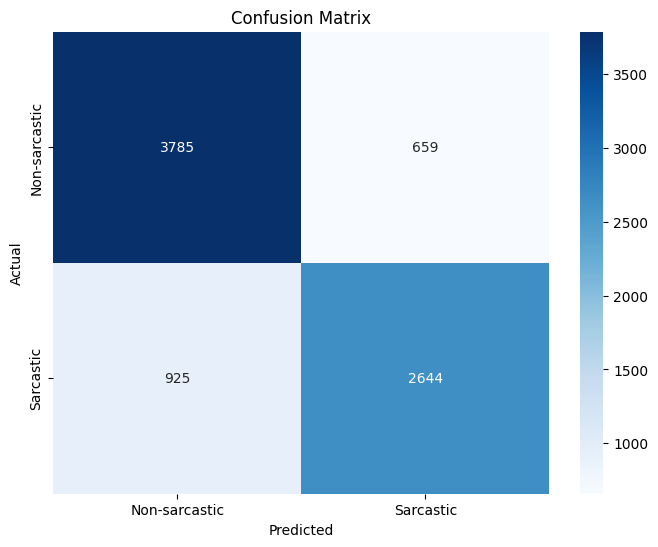

In [1]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import nltk

# Download the stopwords dataset from nltk
nltk.download('stopwords')

# Fetching the JSON data from the URL
url = "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json"
response = requests.get(url)
data = response.json()

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)


# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Tokenization and stopwords removal
stop_words = set(stopwords.words('english'))

def tokenize(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

# Create a pipeline with CountVectorizer and Multinomial Naive Bayes classifier
model1 = make_pipeline(CountVectorizer(tokenizer=tokenize), MultinomialNB())

# Train the model
model1.fit(train_data['headline'], train_data['is_sarcastic'])

# Make predictions
predictions = model1.predict(test_data['headline'])

# Evaluate the model
accuracy = accuracy_score(test_data['is_sarcastic'], predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(test_data['is_sarcastic'], predictions))
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_data['is_sarcastic'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-sarcastic', 'Sarcastic'], yticklabels=['Non-sarcastic', 'Sarcastic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Asking user to Input for Sarcasm detection:**

In [2]:
user_input = input("\nEnter a sentence to check for sarcasm: ")
user_input = pd.Series([user_input])

# Make prediction on user input
user_prediction = model1.predict(user_input)
print(f"\nIs it sarcastic? {'Yes' if user_prediction[0] else 'No'}")


Enter a sentence to check for sarcasm: i am happy

Is it sarcastic? No


**Our Model For Sentimental Analysis**

In this section we implemented our Model for sentimenal analysis. In this model we used tokenizer first to effectively analyze sentiment. Tokenization breaks down text into manageable units, handles word variations, and improves efficiency. NLP addresses language complexity, removes noise, and enhances feature representation. These techniques prepare text for machine understanding, allowing our model to focus on sentiment-bearing patterns and contextual information.

In [3]:
!pip install requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
url = "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json"

**Reading Dataset:**

In [4]:
response = requests.get(url)
reviews = response.json()
reviews = pd.DataFrame(reviews)
reviews.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [5]:
# Display the class distribution
sentences = reviews['headline'].to_numpy()
labels = reviews['is_sarcastic'].to_numpy()
print("Class distribution:")
print(reviews['is_sarcastic'].value_counts())

Class distribution:
0    14985
1    11724
Name: is_sarcastic, dtype: int64


Splitting Dataset training and test

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.3, random_state=42)
print("Training Data Input: ", X_train.shape)
print("Training Data Output : ", y_train.shape)
print("Testing Data Input : ", X_test.shape)
print("Testing Data Output: ", y_test.shape)

Training Data Input:  (18696,)
Training Data Output :  (18696,)
Testing Data Input :  (8013,)
Testing Data Output:  (8013,)


In [7]:
reviews['website'] = reviews.article_link.apply(lambda x: x.split('/')[2])
reviews

,article_link,headline,is_sarcastic,website
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,www.huffingtonpost.com
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,www.huffingtonpost.com
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,local.theonion.com
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,politics.theonion.com
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,www.huffingtonpost.com
...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,www.huffingtonpost.com
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,www.huffingtonpost.com
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,www.huffingtonpost.com
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,www.huffingtonpost.com


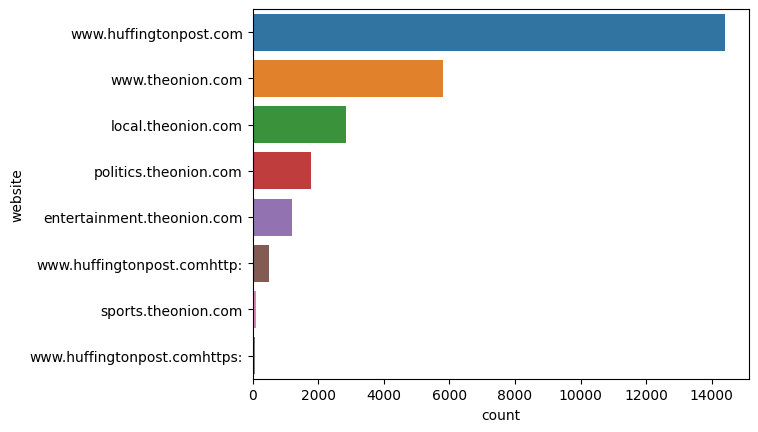

In [8]:
sns.countplot(y= reviews.website ,data=reviews, order = reviews['website'].value_counts().index);

**Tokenization:**

In [9]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  18696
Number of Words:  10000


In [10]:
	tokenizer.word_counts

OrderedDict([('teen', 85),
             ('study', 186),
             ('bible', 16),
             ('found', 74),
             ('to', 5796),
             ('increase', 18),
             ('fun', 33),
             ('of', 3914),
             ('religion', 13),
             ('by', 607),
             ('03', 1),
             ('montana', 6),
             ('gop', 172),
             ('candidate', 45),
             ('owns', 7),
             ('stake', 3),
             ('in', 2915),
             ('company', 68),
             ('accused', 37),
             ('paying', 14),
             ('off', 272),
             ('isis', 45),
             ('2015', 43),
             ('u', 328),
             ('s', 316),
             ('best', 171),
             ('ranked', 4),
             ('cities', 25),
             ('for', 2316),
             ('hotels', 8),
             ('starting', 34),
             ('a', 2139),
             ('small', 42),
             ('business', 73),
             ('is', 1193),
             ('anything'

In [11]:
tokenizer.word_docs

defaultdict(int,
            {'of': 3673,
             'increase': 17,
             '03': 1,
             'religion': 13,
             'found': 74,
             'to': 5240,
             'study': 186,
             'fun': 33,
             'teen': 84,
             'by': 605,
             'bible': 15,
             'isis': 45,
             'in': 2825,
             'candidate': 45,
             'company': 68,
             'stake': 3,
             'off': 271,
             'gop': 172,
             'owns': 7,
             'accused': 37,
             'paying': 14,
             'montana': 6,
             'best': 171,
             'for': 2271,
             '2015': 43,
             'ranked': 4,
             'hotels': 8,
             'u': 324,
             's': 314,
             'cities': 25,
             'starting': 34,
             'routine': 11,
             'but': 158,
             'business': 72,
             'a': 1999,
             'is': 1173,
             'small': 42,
             'anything':

In [12]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[3])

[778, 7, 604, 303, 11, 747, 116, 2453]


In [13]:
sequence_length = 80
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')


* My_Model:

In [15]:
import tensorflow as tf
checkpoint_filepath = os.getcwd()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: initial_lr * 10**(epoch/20))
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=10), model_checkpoint_callback]

In [18]:
import tensorflow as tf
embedding_dim=16

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 16)            160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [20]:
num_epochs = 15
initial_lr = 0.001

#Early stop the training if there's no improvement in model performance
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: initial_lr * 10**(epoch/20))

history2 = model2.fit(train_padded, y_train, epochs = num_epochs, validation_data=(test_padded, y_test), callbacks= [early,lr_schedule])

Epoch 1/15
585/585 [==============================] - 10s 16ms/step - loss: 0.2025 - accuracy: 0.9240 - val_loss: 0.3498 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 2/15
585/585 [==============================] - 5s 8ms/step - loss: 0.1883 - accuracy: 0.9295 - val_loss: 0.3895 - val_accuracy: 0.8445 - lr: 0.0011
Epoch 3/15
585/585 [==============================] - 2s 4ms/step - loss: 0.1711 - accuracy: 0.9392 - val_loss: 0.3773 - val_accuracy: 0.8542 - lr: 0.0013
Epoch 4/15
585/585 [==============================] - 3s 5ms/step - loss: 0.1584 - accuracy: 0.9412 - val_loss: 0.3995 - val_accuracy: 0.8532 - lr: 0.0014
Epoch 5/15
585/585 [==============================] - 4s 8ms/step - loss: 0.1480 - accuracy: 0.9464 - val_loss: 0.4644 - val_accuracy: 0.8379 - lr: 0.0016
Epoch 6/15
585/585 [==============================] - 2s 4ms/step - loss: 0.1374 - accuracy: 0.9504 - val_loss: 0.4956 - val_accuracy: 0.8324 - lr: 0.0018
Epoch 7/15
585/585 [==============================] - 3s 5ms/step - 

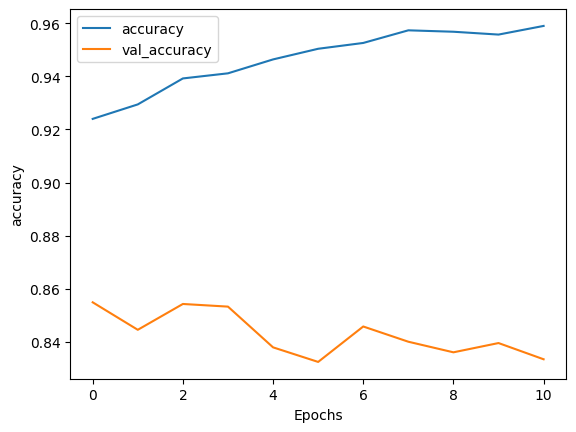

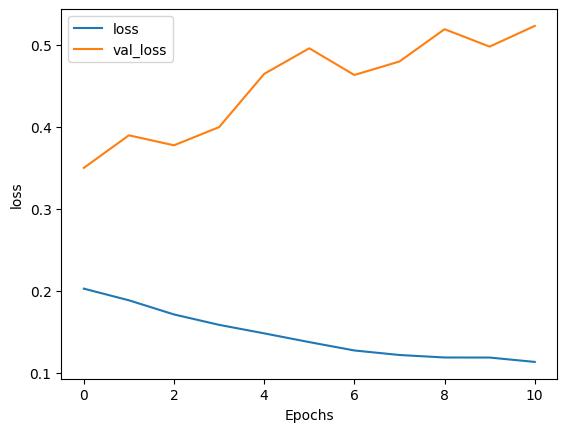

In [22]:
def plot_graphs(history2, string):

    plt.plot(history2.history[string])
    plt.plot(history2.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

**Evaluation Report:**

251/251 [==============================] - 1s 2ms/step
Test Loss: 0.5228
Test Accuracy: 0.8334

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4444
           1       0.84      0.77      0.81      3569

    accuracy                           0.83      8013
   macro avg       0.83      0.83      0.83      8013
weighted avg       0.83      0.83      0.83      8013


Confusion Matrix:
 [[3914  530]
 [ 805 2764]]
251/251 [==============================] - 0s 2ms/step


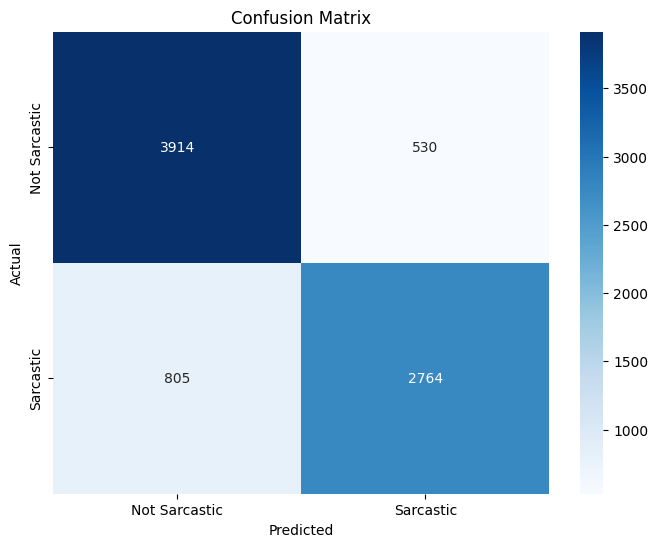

In [23]:
# Evaluate the model on the test set
loss, accuracy = model2.evaluate(test_padded, y_test)

# Make predictions on the test set
predictions = (model2.predict(test_padded) > 0.5).astype("int32")

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
classification_rep = classification_report(y_test, predictions)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to draw confusion matrix
def draw_confusion_matrix(model2, X_test, y_test):
    # Make predictions
    predictions = (model2.predict(X_test) > 0.5).astype("int32")

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example Usage:
draw_confusion_matrix(model2, test_padded, y_test)


**User Input for Sarcasm Detection:**

In [24]:
def predict_sarcasm(model2, tokenizer):
    # Take input from the user
    user_input = input("Enter a headline to predict sarcasm: ")

    # Tokenize and pad the user input
    input_sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(input_sequence, maxlen=sequence_length, padding='post', truncating='post')

    # Make predictions
    prediction = (model2.predict(padded_sequence) > 0.5).astype("int32")

    if prediction == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example Usage:
prediction_result = predict_sarcasm(model2, tokenizer)
print(f"Prediction: {prediction_result}")


Enter a headline to predict sarcasm: i am happy
1/1 [==============================] - 0s 26ms/step
Prediction: Not Sarcastic


In [26]:
# Evaluate the model on the entire test set
loss, accuracy = model2.evaluate(test_padded, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
predictions = (model2.predict(test_padded) > 0.5).astype("int32")

# Check a few predictions against actual labels
for i in range(10):
    print(f"Example {i + 1}: Predicted={predictions[i]}, Actual={y_test[i]}")


251/251 [==============================] - 1s 4ms/step - loss: 0.5228 - accuracy: 0.8334
Test Loss: 0.5228
Test Accuracy: 0.8334
251/251 [==============================] - 1s 3ms/step
Example 1: Predicted=[1], Actual=1
Example 2: Predicted=[0], Actual=0
Example 3: Predicted=[0], Actual=0
Example 4: Predicted=[0], Actual=0
Example 5: Predicted=[1], Actual=0
Example 6: Predicted=[1], Actual=1
Example 7: Predicted=[0], Actual=0
Example 8: Predicted=[0], Actual=1
Example 9: Predicted=[0], Actual=0
Example 10: Predicted=[0], Actual=0
